<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/4.%20Public%20Health%20and%20Safety/Water%20Quality/Water_Quality_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center'>
    <a href="https://ibb.co/jgNSnw2"><img src="https://i.ibb.co/PwLdqWn/water-quality-blog-post-img.jpg" alt="water-quality-blog-post-img" border="0"></a>
</div>

# Project Content
1. [Introduction](#1)
2. [Connecting to Kaggle](#2)
    - 2.1 [Downloading Dataset From Kaggle](#2.1)
3. [Importing Libraries](#3)
4. [Importing Dataset](#4)
5. [First Analysis of Dataset](#5)
    - 5.1 [Getting to Know the Variables](#5.1)
    - 5.2 [Analyzing the Dataframe](#5.2)
    - 5.3 [Unique Values](#5.3)
    - 5.4 [Statistical Summary](#5.4)
        - 5.4.1 [Analysis Output](#5.4.1)
6. [Exploring DataFrame & Variables](#6)
    - 6.1 [Distributions](#6.1)
    - 6.2 [Boxplot](#6.2)
    - 6.3 [Violinplot](#6.3)
    - 6.4 [KDE Plot](#6.4)
    - 6.5 [Correlation](#6.5)
7. [Preparing For Modelling](#7)


# 2. Connecting to Kaggle <a id=2></a>

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## 2.1. Downlading Dataset <a id=2.1></a>

In [ ]:
!kaggle datasets download -d adityakadiwal/water-potability

Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 102MB/s]


In [ ]:
! unzip "water-potability.zip"

Archive:  water-potability.zip
  inflating: water_potability.csv    


# 3. Importing Libraries <a id=3></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 4. Loading Dataset <a id=4></a>

In [6]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 5. First Analysis of Dataset <a id=5></a>

## 5.1 Getting to Know the Variables <a id=5.1></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. **Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0**

## 5.2 Analyzing the Dataframe <a id=5.2></a>

In [8]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB



### Summary
- The dataset contains a total of 3,276 records with 10 columns.
- Most columns are of type `float64`, except for the `Potability` column, which is of type `int64`.
- Missing values are present in three columns:
  - **ph**: 491 missing values (15%)
  - **Sulfate**: 781 missing values (24%)
  - **Trihalomethanes**: 162 missing values (5%)
- The columns `Hardness`, `Solids`, `Chloramines`, `Conductivity`, `Organic_carbon`, `Turbidity`, and `Potability` have no missing values.

In [10]:
df.duplicated().sum()

0

_This dataset does not contains any duplicated records_

In [11]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## 5.3 Unique Values <a id=5.3></a>

In [12]:
pd.DataFrame(df.nunique(), columns=['Unique Values'])

,Unique Values
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


In [13]:
pd.DataFrame(df.Potability.value_counts())

,count
Potability,
0,1998
1,1278


## 5.4 Statistical Summary <a id=5.4></a>

In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


## 5.4.1 Analysis Output: <a id=5.4.1></a>
#### 1. **ph**
- The minimum value of 0.00 suggests possible data entry errors or extreme outliers.
- The mean and median are close, indicating a roughly symmetric distribution.
- The standard deviation is relatively high, indicating variability.
- The max value of 14.00 is an outlier, considering the typical pH range in natural waters is 6-9.

#### 2. **Hardness**
- The values are fairly normally distributed, given the symmetry around the mean.
- The min and max values do not indicate extreme outliers.

#### 3. **Solids**
- High standard deviation indicates large variability.
- The minimum value is extremely low compared to the median and quartiles, suggesting outliers.
- The max value also indicates potential outliers.

#### 4. **Chloramines**
- The min value is quite low, possibly indicating outliers or measurement issues.
- The distribution is fairly symmetric, but the high max value suggests outliers.

#### 5. **Sulfate**
- The distribution appears to be symmetric.
- The min value is significantly lower than the 25th percentile, indicating potential outliers.

#### 6. **Conductivity**
- The distribution is relatively normal.
- Min and max values suggest potential outliers, but they are not extreme.

#### 7. **Organic_carbon**
- The min value suggests potential outliers.
- The distribution appears relatively normal but slightly skewed.

#### 8. **Trihalomethanes**
- The min value is very low, suggesting potential outliers.
- The distribution appears roughly normal.

#### 9. **Turbidity**
- The min and max values suggest the presence of outliers.
- The distribution appears symmetric.

#### 10. **Potability**
- This binary variable (0 or 1) indicates water potability.
- The mean value suggests that approximately 39% of the samples are potable.

### Summary
- **Outliers**: Potential outliers are indicated in the `ph`, `Solids`, `Chloramines`, `Sulfate`, `Organic_carbon`, `Trihalomethanes`, and `Turbidity` columns.
- **Distributions**: Most variables exhibit a roughly normal distribution, with some skewness and outliers.
- **Missing Values**: The `ph`, `Sulfate`, and `Trihalomethanes` columns have missing values that need to be addressed.
- **Variability**: High variability is observed in the `Solids`, `Conductivity`, and `Organic_carbon` columns.

# 6. Exploring DataFrame & Variables <a id=6></a>

## 6.1 Distributions <a id=6.1></a>

In [15]:
def dist(variable):
    # calculate mean and median
    var_mean = df[variable].mean()
    var_median = df[variable].median()
    # Distplot
    plt.figure(figsize=(8, 5))
    sns.distplot(x=df[variable], hist=True, kde=True)
    plt.axvline(var_mean, linestyle='--', label='Mean', color='b')
    plt.axvline(var_median, linestyle='-', label='Median', color='r')
    plt.title(f"{variable} Distribution", fontsize=15)
    plt.xlabel(f"{variable}", fontsize=12)
    plt.legend()
    plt.show()

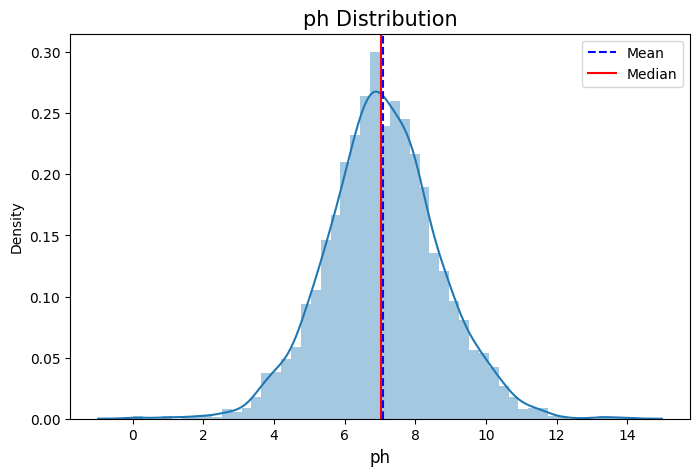

In [16]:
dist('ph')

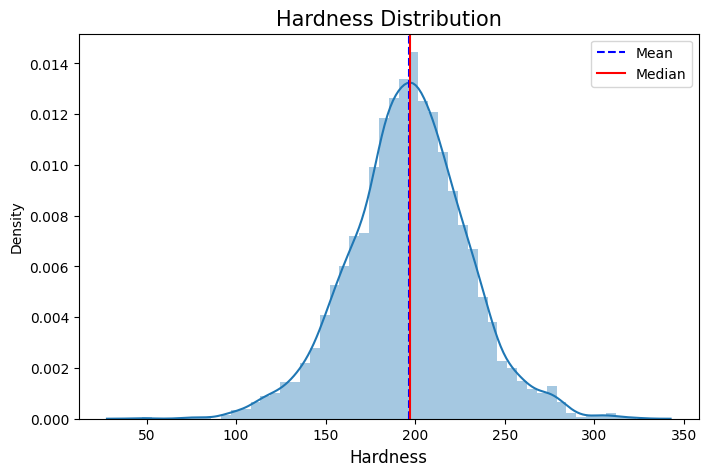

In [17]:
dist('Hardness')

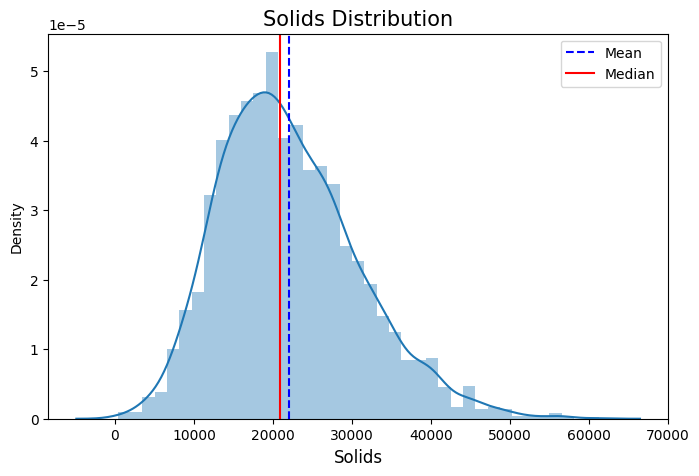

In [18]:
dist('Solids')

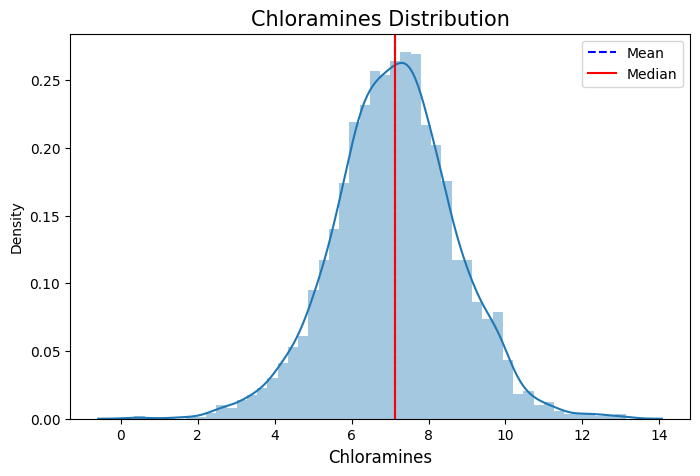

In [19]:
dist('Chloramines')

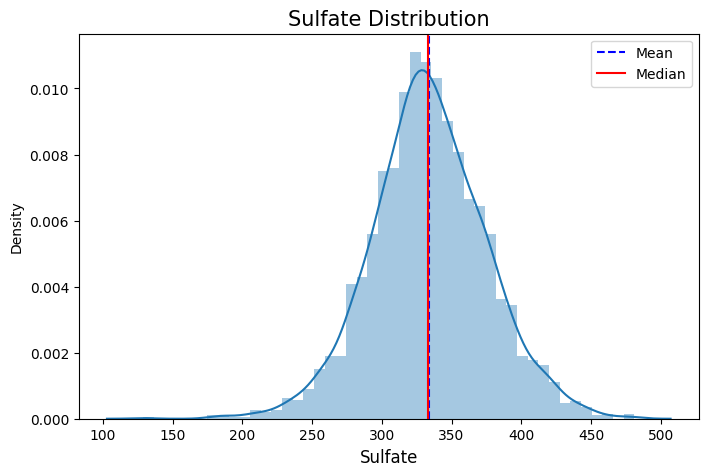

In [20]:
dist('Sulfate')

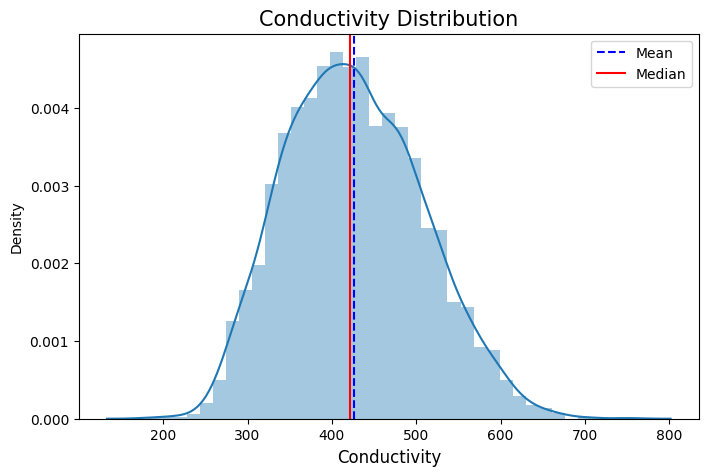

In [21]:
dist('Conductivity')

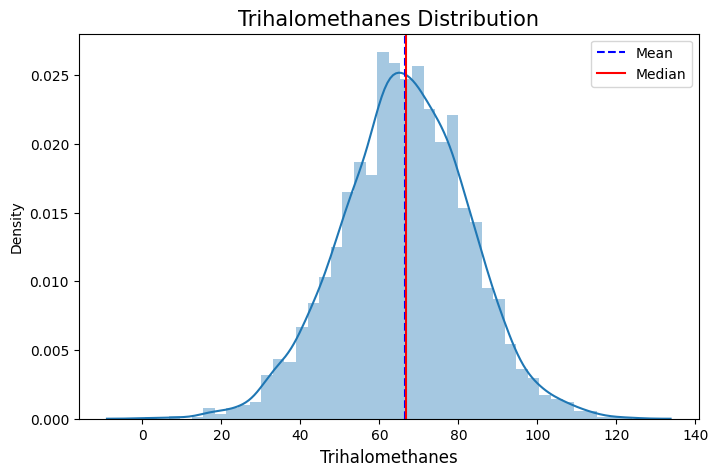

In [22]:
dist('Trihalomethanes')

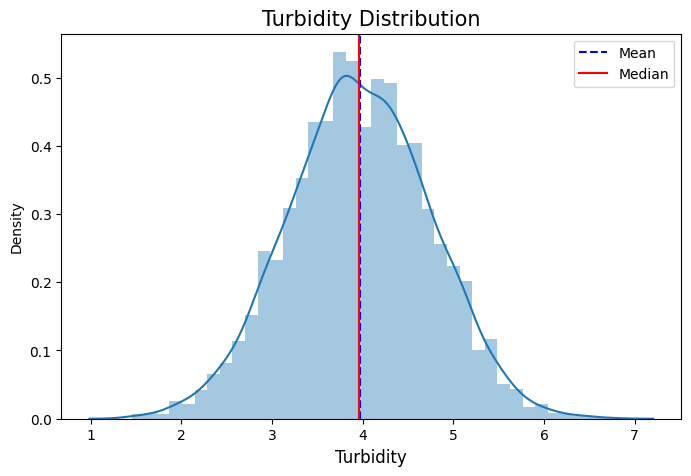

In [23]:
dist('Turbidity')

## 6.2 Boxplot <a id=6.2></a>

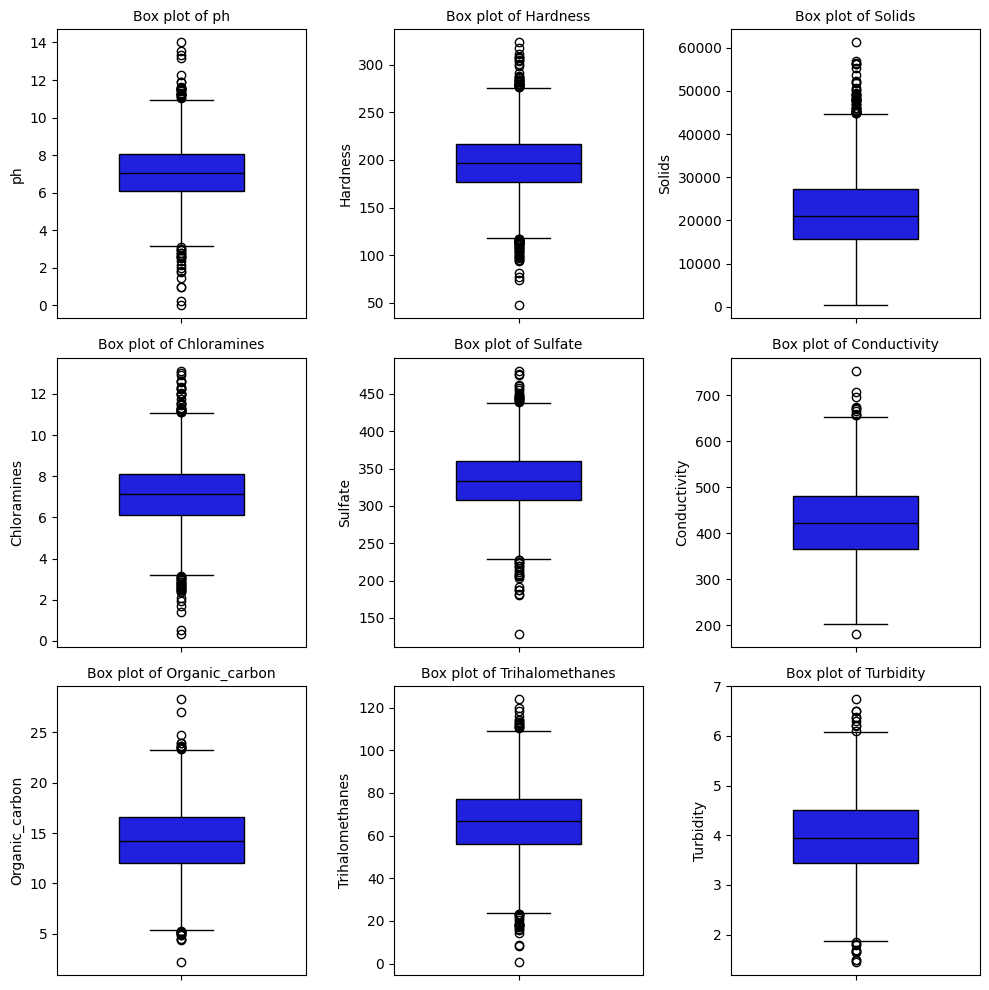

In [24]:
# Plotting box plots
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column, width=0.5, linecolor='black', color='blue')
    plt.title(f'Box plot of {column}', fontsize=10)

plt.tight_layout()
plt.show()

## 6.3 Violinplot <a id=6.3></a>

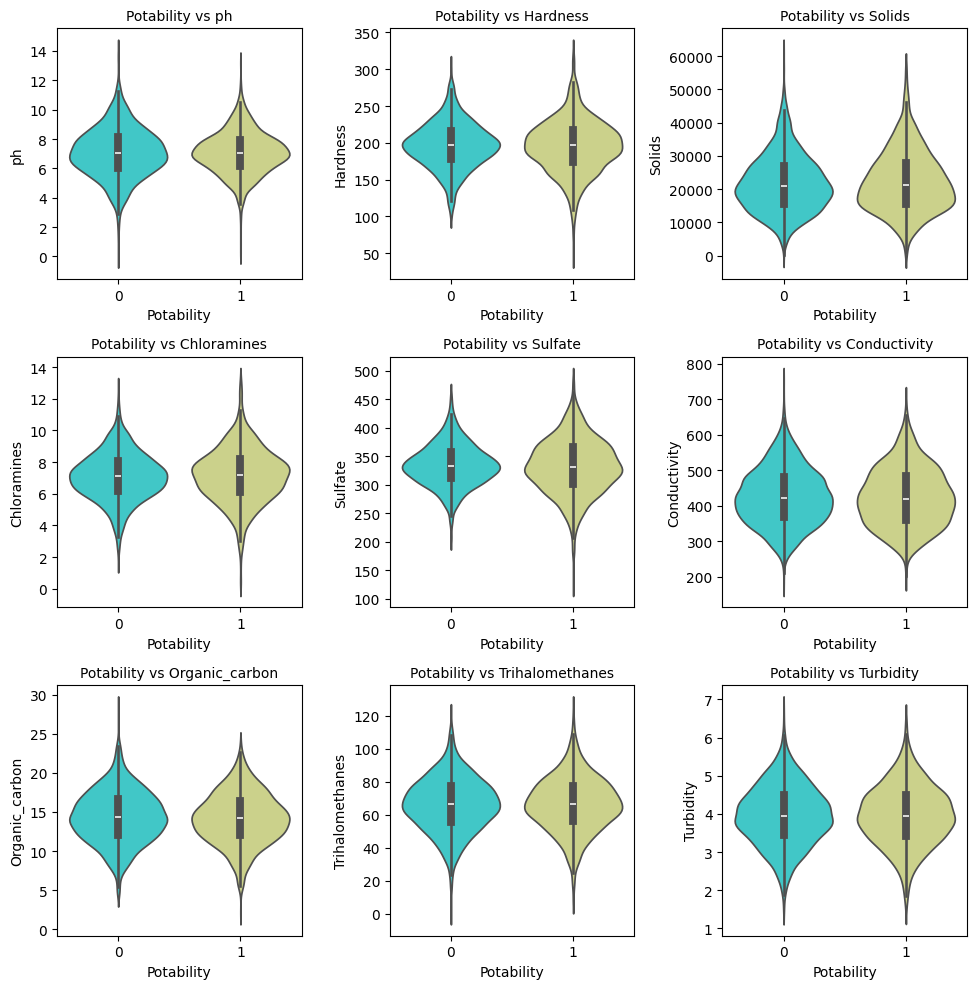

In [ ]:
# Plotting violin plots
plt.figure(figsize=(10, 10))
for i, var in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Potability', y=var, data=df, palette='rainbow')
    plt.title(f'Potability vs {var}', fontsize=10)
plt.tight_layout()
plt.show()


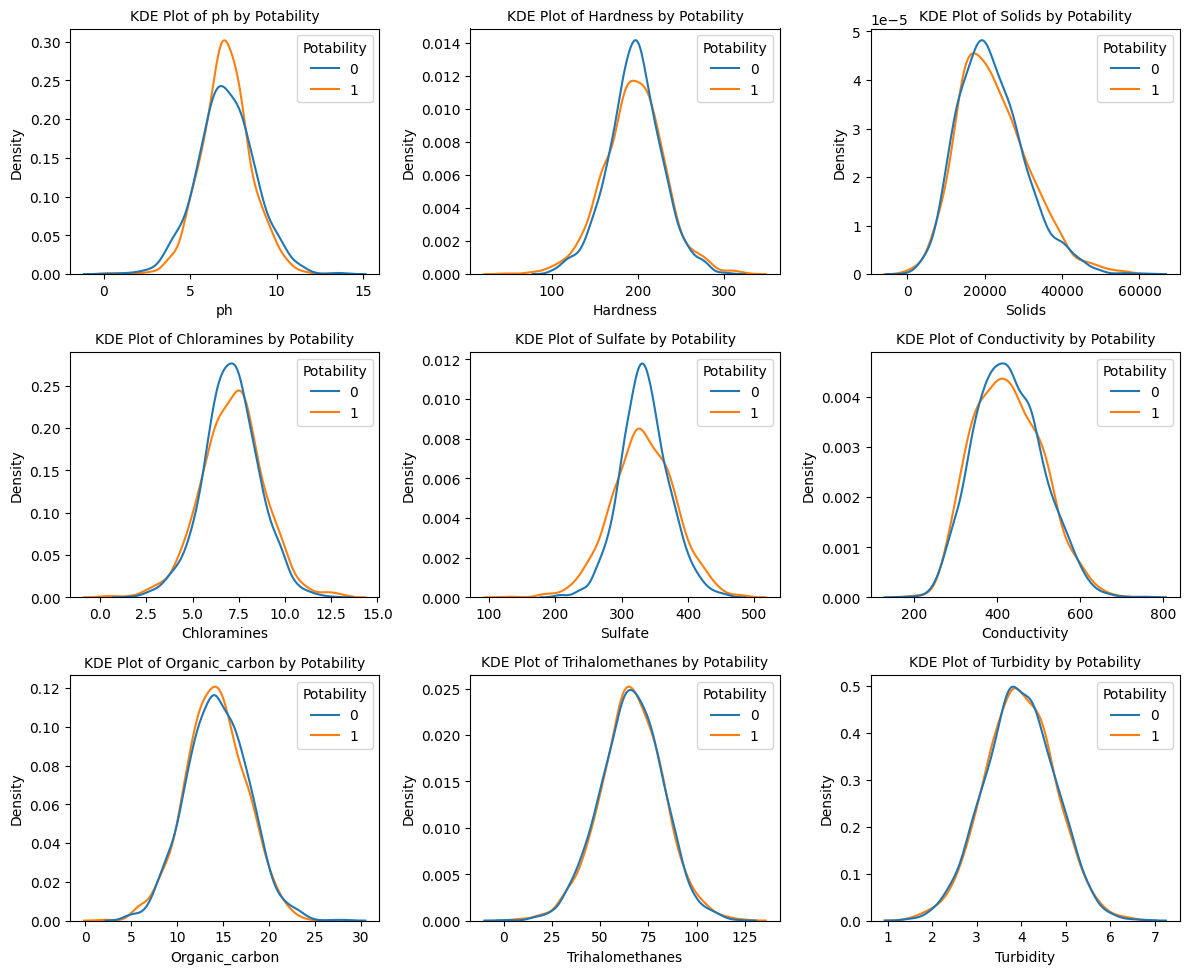

In [ ]:
# Plotting KDE plots
plt.figure(figsize=(12, 10))
for i, var in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=var, hue='Potability', common_norm=False)
    plt.title(f'KDE Plot of {var} by Potability', fontsize=10)
plt.tight_layout()
plt.show()

## 6.5 Correlation <a id=6.5></a>

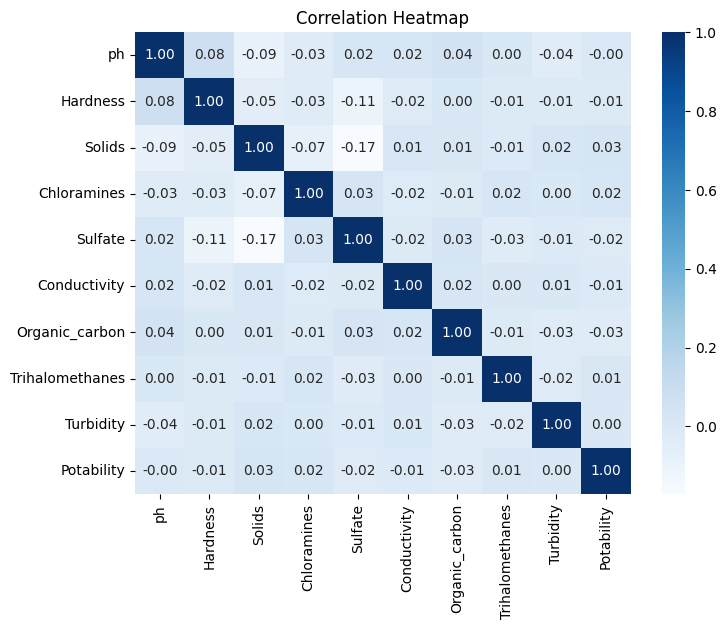

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# 7. Preparing For Modelling <a id=7></a>

## 7.1 Missing Values <a id=7.1></a>

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
missing_values_columns = ['ph', 'Sulfate', 'Trihalomethanes']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in missing_values_columns:
    df[col] = imputer.fit_transform(df[[col]])

In [27]:
df.isna().sum() # To validate handling missing values

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# 8. Modelling <a id=8></a>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 8.1 Decision Tree <a id=8.1></a>

In [ ]:
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

# Reshaing y
y = y.reshape(len(y),1)

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}

# Example of GridSearchCV usage
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 10, 20, 30]},
             verbose=1)

In [ ]:
print("**" * 50)
print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)
print("**" * 50)

****************************************************************************************************
Best Score:  0.6335877862595419
Best Params:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 20}
****************************************************************************************************


In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
print(F"Accuracy Score: ", accuracy_score(y_test, predictions))

Accuracy Score:  0.6600609756097561


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       412
           1       0.57      0.34      0.42       244

    accuracy                           0.66       656
   macro avg       0.63      0.59      0.59       656
weighted avg       0.64      0.66      0.63       656



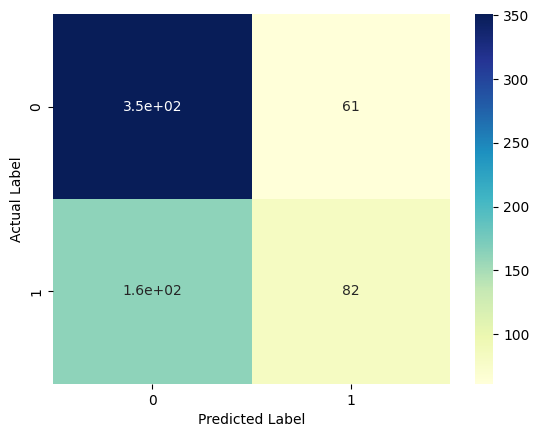

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

## 8.2 Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

# Hyperparameter
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=1, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [152]:
print("**" * 50)
print("Best Score: ", random_search.best_score_)
print("Best Params: ", random_search.best_params_)
print("**" * 50)

****************************************************************************************************
Best Score:  0.6729007633587787
Best Params:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}
****************************************************************************************************


In [153]:
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

In [155]:
print(accuracy_score(y_test, predictions))

0.6844512195121951


In [154]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.64      0.34      0.45       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.68      0.66       656



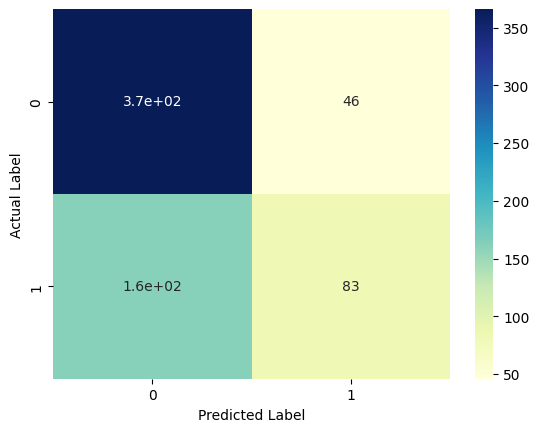

In [156]:
cnf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

## 8.3 Logistic Regression <a id=8.3></a>

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'l1_ratio': [0, 0.5, 1]
}

log_model = LogisticRegression()

# log_model_grid_search = GridSearchCV(estimator=log_model, param_grid = param_grid, cv=5, verbose=1, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=log_model, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("**" * 50)
print("Best Score: ", random_search.best_score_)
print("Best Params: ", random_search.best_params_)
print("**" * 50)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, predictions))

0.6463414634146342


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       412
           1       0.54      0.32      0.41       244

    accuracy                           0.65       656
   macro avg       0.61      0.58      0.58       656
weighted avg       0.63      0.65      0.62       656



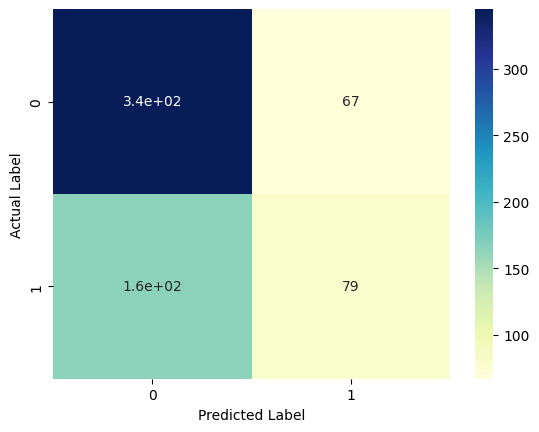

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

## 8.4 SVM <a id=8.4></a>

In [35]:
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Reshaping y
# y = y.reshape(len(y),1)

In [36]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_model = SVC()

param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

random_search = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

In [ ]:
print("**" * 50)
print("Best Score: ", random_search.best_score_)
print("Best Params: ", random_search.best_params_)
print("**" * 50)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)